In [1]:
# importing all the necessary liraries/modules

import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import json
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report

# **Importing the dataset**:

In [2]:
# Importing the dataset onto python
df = pd.read_csv('C:/Users/harshitha/Downloads/Life Expectancy Data_HV22.csv')

In [3]:
# Moving the Target column to the end

def moveColumn(df, column_name, position):
  column_to_move = df.pop(column_name)
  df.insert(position, column_name, column_to_move)

moveColumn(df, 'Life expectancy ', 21)

In [4]:
df.head()

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
0,Afghanistan,2015,Developing,263.0,62,0.01,71.279624,65.0,1154,19.1,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,Afghanistan,2014,Developing,271.0,64,0.01,73.523582,62.0,492,18.6,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,59.9
2,Afghanistan,2013,Developing,268.0,66,0.01,73.219243,64.0,430,18.1,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,59.9
3,Afghanistan,2012,Developing,272.0,69,0.01,78.184215,67.0,2787,17.6,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,59.5
4,Afghanistan,2011,Developing,275.0,71,0.01,7.097109,68.0,3013,17.2,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,59.2


# **Basic Summary about df**:

In [5]:
# Basic statistical summary of the df
df.describe()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
count,2938.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000,2928.000000
mean,2007.518720,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793,69.224932
std,4.613841,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920,9.523867
min,2000.000000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000,36.300000
25%,2004.000000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000,63.100000
50%,2008.000000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000,72.100000
75%,2012.000000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000,75.700000
max,2015.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000,89.000000


In [6]:
# data types of all the columns
df.dtypes

Country                             object
Year                                 int64
Status                              object
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
Life expectancy                    float64
dtype: object

In [7]:
# Prnitin the basic idea about the df
print("Total number of NA values in df:", df.isna().sum().sum(), "\nTotal number of columns in df:", len(df.columns), "\nThere are", len(df['Country'].unique()), "countries in total.")

Total number of NA values in df: 2563 
Total number of columns in df: 22 
There are 193 countries in total.


# **Dealing with all the missing values**:

In [8]:
# Calculating the number of NA values in each column
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
Life expectancy                     10
dtype: int64

### Country 

In [9]:
# Eliminating all the countries with only 1 instance
countries = df["Country"].value_counts()
oneCountry = list(countries[countries == 1].index)
oneCountry

['Tuvalu',
 'Cook Islands',
 'Marshall Islands',
 'Monaco',
 'Palau',
 'Niue',
 'San Marino',
 'Nauru',
 'Saint Kitts and Nevis',
 'Dominica']

In [10]:
for element in df["Country"]:
  if element in oneCountry:
    indices = df[df["Country"]==element].index
    df.drop(indices,axis=0, inplace=True)

In [11]:
# resetting the index of the df
df.reset_index(drop=True, inplace=True)

### Rest of the columns

<AxesSubplot: >

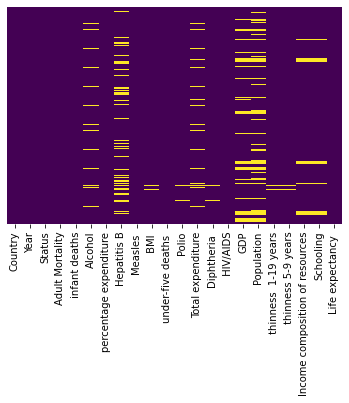

In [12]:
# Plotting a correlation heatmap for all the NaN values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [13]:
# Filling in all the NaN values through the 'interpolate' method

df.reset_index(inplace=True)
df.groupby('Country').apply(lambda group: group.interpolate(method= 'linear'))
imputed_data = []
for year in list(df.Year.unique()):
    year_data = df[df.Year == year].copy()
    for col in list(year_data.columns)[4:]:
        year_data[col] = year_data[col].fillna(year_data[col].dropna().median()).copy()
    imputed_data.append(year_data)
df = pd.concat(imputed_data).copy()

<ipython-input-13-e45010ce39de>:4: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df.groupby('Country').apply(lambda group: group.interpolate(method= 'linear'))


In [14]:
print("The number of NaN values in the df:", df.isna().sum().sum())

The number of NaN values in the df: 0


# **EDA**

1. Basic Plots

2. Automated EDA

In [24]:
pip install pandas_profiling

  Using cached statsmodels-0.13.5-cp38-cp38-win_amd64.whl (9.2 MB)

  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27085 sha256=89c1be09c68465ef5b20c5c23ce4303cd8a216a85ba3ac42256dfb4be008c283
  Stored in directory: c:\users\harshitha\appdata\local\pip\cache\wheels\23\14\6e\4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
Successfully built htmlmin
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [25]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title="Pandas Profiling Report")
profile.to_file("hv_report.html")

Pandas backend loaded 1.5.1
Numpy backend loaded 1.22.4
Pyspark backend NOT loaded
Python backend loaded


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\harshitha\anaconda3\lib\site-packages\multimethod\__init__.py:315: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  return func(*args, **kwargs)
C:\Users\harshitha\anaconda3\lib\site-packages\multimethod\__init__.py:315: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  return func(*args, **kwargs)


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

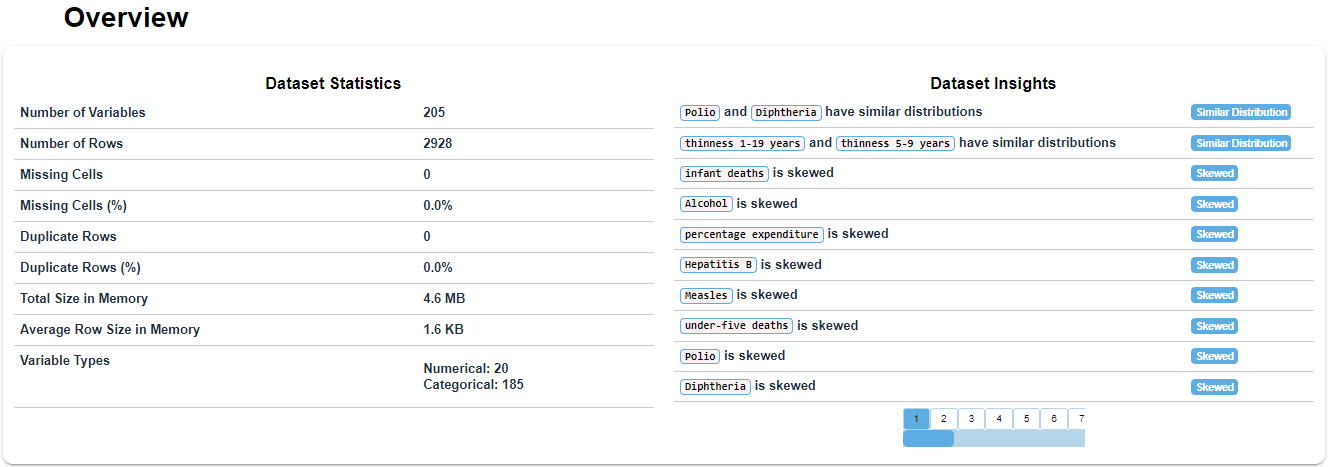

3. Manual Plotting

In [17]:
df_copy = df.copy()

In [18]:
df_copy.head()

,index,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
0,0,Afghanistan,2015,Developing,263.0,62,0.010,71.279624,65.0,1154,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
16,16,Albania,2015,Developing,74.0,0,4.600,364.975229,99.0,0,...,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2,77.8
32,32,Algeria,2015,Developing,19.0,21,5.285,0.000000,95.0,63,...,7.08,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4,75.6
48,48,Angola,2015,Developing,335.0,66,5.285,0.000000,64.0,118,...,7.08,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4,52.4
64,64,Antigua and Barbuda,2015,Developing,13.0,0,5.285,0.000000,99.0,0,...,7.08,99.0,0.2,13566.954100,2076086.0,3.3,3.3,0.784,13.9,76.4


3.1 Box Plot for Outliers

In [19]:
df_copy.columns

Index(['index', 'Country', 'Year', 'Status', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'Life expectancy '],
      dtype='object')

In [20]:
col_dict = {'Life expectancy ': 1, 'Adult Mortality': 2, 'Alcohol': 3, 'Percentage expenditure': 4, 'Hepatitis B': 5, 'Measles ': 6, ' BMI ': 7, 'under-five deaths ': 8, 'Polio' : 9, 'Total expenditure' :10,
       'Diphtheria': 11, 'HIV/AIDS': 12, 'GDP': 13, 'Population': 14, 'Thinness_1-19_years': 15, 'Thinness_5-9_years': 16, 'Income_composition_of_resources': 17, 'Schooling': 18, 'Infant_deaths': 19}

KeyError: 'Percentage expenditure'

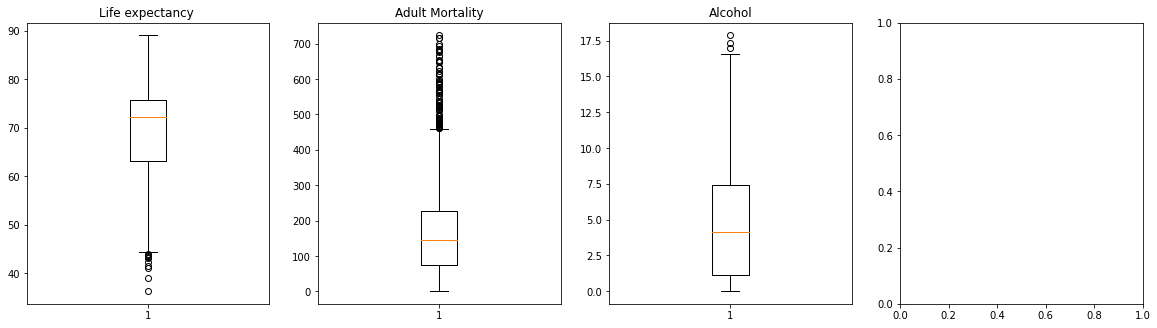

In [21]:
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.title(variable)

plt.show()

# **Training a Linear Regression model**

### Label Encoding the categorical variable

In [ ]:
# One Hot Encoding the Status column
# One Hot Encoding basically splits the unique values of a column to different columns

one_hot_encoder_status = OneHotEncoder()
status_reshaped = np.array(df['Status']).reshape(-1, 1)
status_values = one_hot_encoder_status.fit_transform(status_reshaped)

status_col = df['Status'].unique()
status_df = pd.DataFrame(status_values.toarray(), columns = status_col)

df = pd.concat([df, status_df], axis = 1)
df = df.drop(['Status'], axis = 1)

In [ ]:
df.drop(['index'], axis = 1, inplace = True)

In [ ]:
one_hot_encoder_country = OneHotEncoder()
country_reshaped = np.array(df['Country']).reshape(-1, 1)
country_values = one_hot_encoder_country.fit_transform(country_reshaped)

country_col = df['Country'].unique()
country_df = pd.DataFrame(country_values.toarray(), columns = country_col)

df = pd.concat([df, country_df], axis = 1)
df = df.drop(['Country'], axis = 1)

### Outlier Analysis

In [ ]:
def outlierAnalysis(df, col_name):

  df_score = pd.DataFrame(zscore(df[col_name]))

  score_index = []
  for i in range(len(df_score)):
    if (df[col_name][i]>3) or (df[col_name][i]<-3):
      score_index.append(i)
    else:
      pass

  return score_index

In [ ]:
# outlierAnalysis(df, 'Polio')

Each column seems to have great huge amount of rows with absolute value so, we avoid using this methd to inrease the efficiency of the model.

### Model Training

In [ ]:
# Selecting columns with moderate to high correlation values
sns.set(rc={'figure.figsize':(20, 8.27)})
corr_map = sns.heatmap(df[['Year', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling', 'Life expectancy ', 'Developing', 'Developed']].corr().round(2), annot=True)

In [ ]:
# Splitting the data into Features and Targets

X = df.drop('Life expectancy ', axis = 1) # X --> Features
X = X.apply(pd.to_numeric, errors='coerce')
y = df['Life expectancy '] # y --> Target Variable
y = y.apply(pd.to_numeric, errors='coerce')

In [ ]:
# Splitting the data into training data and testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)
linear_regressor = LinearRegression()

In [ ]:
# Fitting the Data
linear_regressor.fit(X_train, y_train)

# Predicting the Target Variable
y_pred = linear_regressor.predict(X_test)

### Regression Plot

In [ ]:
# Plotting the true and predicted value 
fig = plt.figure(figsize =(20, 10))
sns.regplot(y_test, y_pred)
plt.xlabel("LE Test")
plt.ylabel("LE Predicted")
plt.title("True Value vs Predicted Value")
plt.show()

### Accuracy Count

In [ ]:
# Chcking the accuracy of the model 
print("The accuracy of the model is", linear_regressor.score(X_test, y_test))

In [ ]:
print("The r2 score of the model is", r2_score(y_test, y_pred))

### Evaluation Metrics

In [ ]:
# Evaluation Metrics
print("The Absolute Mean Error of the model is", mean_absolute_error(y_test, y_pred))

In [ ]:
print("The Mean Squared Error of the model is", mean_squared_error(y_test, y_pred))

In [ ]:
# Intercept of the model
intercept = linear_regressor.intercept_

# Coefficeints of the model
m = linear_regressor.coef_

In [ ]:
print("The intercept of the model is", intercept, "\n\nThe weights of the features are as follows:\n", m)

### Equation of the model

In [ ]:
# Equation of the model

def predictLE(weights, x):

  equation = 0
  for i in range(len(m)):
      equation += (weights[i]*x[i])
  equation += intercept
  print("The Life Expectancy is " + str(equation))